In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import json
import math

import scipy.stats as sp

import statsmodels.api as sm
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


file = "Resources/Caffeine/caffeine.csv"
file = pd.read_csv(file)
file.head()


,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [3]:
file['type'].value_counts()

Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64

In [4]:
file.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


In [5]:
#Copy data frame
df = file.copy()

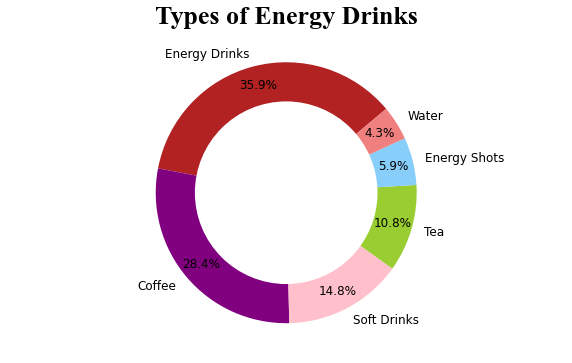

In [6]:
drink_types = df.type.value_counts().index.tolist()
drink_type_counts = df.type.value_counts().values.tolist()
colors = ["firebrick", "purple", "pink", "yellowgreen", "lightskyblue", "lightcoral"]
explode = (0, 0, 0, 0, 0, 0)

fig = plt.figure(figsize=(10,6))

plt.title("Types of Energy Drinks", fontsize = 26, fontweight = "bold", font = "Times New Roman")
plt.axis("equal")

centre_circle = plt.Circle((0,0), 0.70, fc='white')


plt.pie(drink_type_counts, explode=explode, labels=drink_types, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=40, textprops={'fontsize': 12}, pctdistance=0.85)

fig.gca().add_artist(centre_circle)
plt.show()

In [12]:
file

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [7]:
#Create a dataframe calling out individual brands for comparison
df = df.loc[df.drink.str.contains ("Starbucks")]
#Find max of caffine content per pop. type brand
df.value_counts("Caffeine (mg)")
df.max()

drink            Starbucks Via Ready Brew
Volume (ml)                      1419.528
Calories                              370
Caffeine (mg)                         640
type                          Soft Drinks
dtype: object

In [11]:
#Create a dataframe calling out individual brands for comparison
df = df.loc[df.drink.str.contains ("Dunkin")]
#Find max of caffine content per pop. type brand
df.value_counts("Caffeine (mg)")
df.max()

drink            Dunkin' Donuts Latte
Volume (ml)                   709.764
Calories                          350
Caffeine (mg)                     297
type                              Tea
dtype: object

In [19]:
#Create a dataframe calling out individual brands for comparison
df1 = file.loc[file.drink.str.contains ("MiO")]
#Find max of caffine content per pop. type brand
df1.value_counts("Caffeine (mg)")
df1.max()

drink            MiO Energy Water Enhancer
Volume (ml)                        236.588
Calories                                 0
Caffeine (mg)                           60
type                                 Water
dtype: object

In [ ]:
#find a way to loop through all 6 types to find the df.max beverage by caffeine content



#Create a bar chart comparing all maxes, or which ever graph represents the data best



In [9]:
type_group = file.groupby(["type"])
print(type_group)

type_group.count().head(10)

df = pd.DataFrame(file)
df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


In [10]:


group0 = df[df["Volume (ml)"] == 0]["Calories"]
group1 = df[df["Volume (ml)"] == 1]["Calories"]
group2 = df[df["Volume (ml)"] == 2]["Calories"]
group3 = df[df["Volume (ml)"] == 3]["Calories"]
group4 = df[df["Volume (ml)"] == 4]["Calories"]

# Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4)


NameError: name 'stats' is not defined

In [ ]:
stats.ttest_ind(group0, group4, equal_var=False)